# LSA (Latent Semantic Analysis, 잠재 의미 분석)

- 토픽 모델링에 아이디어를 제공한 알고리즘
- 추후, LDA가 LSA의 단점을 보완!
- 등장 배경 : DTM, TF-IDF등은 단어의 빈도수를 기반으로 하지만, 단어의 의미를 고려하지 못함! 
이를 위한 대안으로 DTM의 잠재된 의미를 끌어내는 방법! (Latent Semantic Analysis)

## 1. 특이값 분해 (Singular Value Decomposition, SVD)

- A가 m x n 행렬일 때, 다음과 같이 3개의 행렬 곱으로 분해하는 것!

### 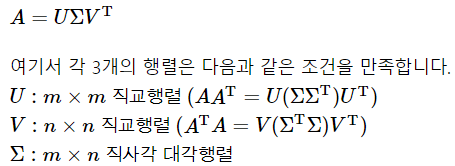

## 2. 절단된 SVD

-  LSA의 경우, Full SVD에서 나온 3개의 행렬에서, 일부 벡터들을 삭제시킨 "절단된 SVD(truncated SVD)를 사용"
- 절단된 SVD는 대각 행렬 Σ의 대각 원소의 값 중에서 상위값 t개만 남게 됨
- ( 절단된 SVD를 수행 시 값의 손실 -> 기존의 행렬 A를 복구 X )
- U행렬과 V행렬의 t열까지만 남기고, 여기서 t는 우리가 찾고자하는 토픽의 수를 반영한 hyperparameter
- t를 크게 잡으면 기존의 행렬 A로부터 다양한 의미를 가져갈 수 있지만, t를 작게 잡아야만 노이즈를 제거할 수 있음

### 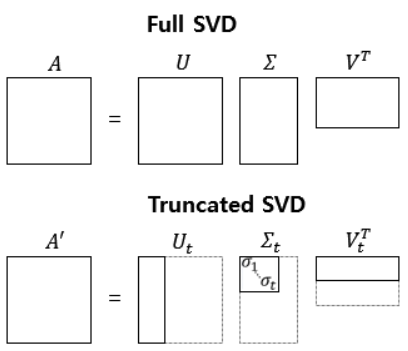

## 3. Latent Semantic Analysis

In [1]:
import numpy as np
A=np.array([[0,0,0,1,0,1,1,0,0],[0,0,0,1,1,0,1,0,0],[0,1,1,0,2,0,0,0,0],[1,0,0,0,0,0,0,1,1]])

In [2]:
A, A.shape

(array([[0, 0, 0, 1, 0, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 2, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 1]]), (4, 9))

### 1) Full SVD

In [3]:
U, s, VT = np.linalg.svd(A, full_matrices = True)

In [4]:
U.shape, s.shape, VT.shape

((4, 4), (4,), (9, 9))

#### a) U

In [5]:
U.round(2)

array([[-0.24,  0.75,  0.  , -0.62],
       [-0.51,  0.44, -0.  ,  0.74],
       [-0.83, -0.49, -0.  , -0.27],
       [-0.  , -0.  ,  1.  ,  0.  ]])

#### b) S

In [6]:
# 특이값
s.round(2)

array([2.69, 2.05, 1.73, 0.77])

In [7]:
S = np.zeros((4, 9)) # 대각 행렬의 크기인 4 x 9의 임의의 행렬 생성
S[:4, :4] = np.diag(s) # 특이값을 대각행렬에 삽입

In [8]:
S

array([[2.68731789, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.04508425, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.73205081, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.77197992, 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

#### 3) V

In [9]:
VT.round(2)

array([[-0.  , -0.31, -0.31, -0.28, -0.8 , -0.09, -0.28, -0.  , -0.  ],
       [ 0.  , -0.24, -0.24,  0.58, -0.26,  0.37,  0.58, -0.  , -0.  ],
       [ 0.58, -0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.58,  0.58],
       [ 0.  , -0.35, -0.35,  0.16,  0.25, -0.8 ,  0.16, -0.  , -0.  ],
       [-0.  , -0.78, -0.01, -0.2 ,  0.4 ,  0.4 , -0.2 ,  0.  ,  0.  ],
       [-0.29,  0.31, -0.78, -0.24,  0.23,  0.23,  0.01,  0.14,  0.14],
       [-0.29, -0.1 ,  0.26, -0.59, -0.08, -0.08,  0.66,  0.14,  0.14],
       [-0.5 , -0.06,  0.15,  0.24, -0.05, -0.05, -0.19,  0.75, -0.25],
       [-0.5 , -0.06,  0.15,  0.24, -0.05, -0.05, -0.19, -0.25,  0.75]])

### 2) Truncated SVD

- t를 2로 정함 ( 2개의 열만 남기고 전부 제거 )

In [10]:
S_ = S[:2,:2]
U_ = U[:,:2]
VT_ = VT[:2,:]

In [11]:
U_

array([[-2.39751712e-01,  7.51083898e-01],
       [-5.06077194e-01,  4.44029376e-01],
       [-8.28495619e-01, -4.88580485e-01],
       [-9.04299898e-17, -4.11929620e-17]])

In [12]:
S_

array([[2.68731789, 0.        ],
       [0.        , 2.04508425]])

In [13]:
VT_

array([[-1.19459176e-16, -3.08298331e-01, -3.08298331e-01,
        -2.77536539e-01, -8.04917216e-01, -8.92159849e-02,
        -2.77536539e-01, -4.41881458e-17, -4.41881458e-17],
       [ 2.92323807e-17, -2.38904821e-01, -2.38904821e-01,
         5.84383395e-01, -2.60689306e-01,  3.67263060e-01,
         5.84383395e-01, -3.42420311e-17, -3.42420311e-17]])

## 4. 실습 (fetch_20newsgroups)

### 1) data overview

In [14]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

In [15]:
dataset = fetch_20newsgroups(shuffle=True,random_state=1, remove=('headers','footers','quotes'))

In [16]:
documents = dataset.data

In [17]:
# 총 11314의 news text
len(documents)

11314

In [18]:
documents[1]

"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [19]:
# target ( = topic 종류들 )
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### 2) data preprocessing

In [20]:
news_df = pd.DataFrame({'document':documents})

news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [22]:
# BEFORE
news_df['document'][1]

"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [21]:
# AFTER
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that will happily ever after anyway maybe start newsgroup atheist hard bummin much forget your flintstone chewables bake timmons'

#### 불용어 처리

In [26]:
from nltk.corpus import stopwords

In [27]:
stop_words = stopwords.words('english') # 1) 불용어 설정
tokenized_doc = news_df['clean_doc'].apply(lambda x : x.split()) # 2) tokenize
tokenized_doc = tokenized_doc.apply(lambda x : [item for item in x if item not in stop_words]) # 3) 불용어 제거

In [28]:
tokenized_doc[1]

['yeah',
 'expect',
 'people',
 'read',
 'actually',
 'accept',
 'hard',
 'atheism',
 'need',
 'little',
 'leap',
 'faith',
 'jimmy',
 'logic',
 'runs',
 'steam',
 'sorry',
 'pity',
 'sorry',
 'feelings',
 'denial',
 'faith',
 'need',
 'well',
 'pretend',
 'happily',
 'ever',
 'anyway',
 'maybe',
 'start',
 'newsgroup',
 'atheist',
 'hard',
 'bummin',
 'much',
 'forget',
 'flintstone',
 'chewables',
 'bake',
 'timmons']

### 3) TF-IDF 행렬
- 불용어 제거를 위해 token화 진행했었음
- 그러나 TfidfVectorizer는 token화 되지 않은 text data를 입력으로 받음!
- 다시 역토큰화(Detokenization) 해줘야

In [31]:
print(news_df.shape)
news_df.head()

(11314, 2)


,document,clean_doc
0,Well i'm not sure about the story nad it did s...,well sure about story seem biased what disagre...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re...",yeah expect people read actually accept hard a...
2,Although I realize that principle is not one o...,although realize that principle your strongest...
3,Notwithstanding all the legitimate fuss about ...,notwithstanding legitimate fuss about this pro...
4,"Well, I will have to change the scoring on my ...",well will have change scoring playoff pool unf...


#### Detokenization

In [33]:
detokenized_doc = []

for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i]) # token화된 단어들을 다시 연결시켜줌
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [34]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgroup atheist hard bummin much forget flintstone chewables bake timmons'

#### TF-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vectorizer = TfidfVectorizer(stop_words='english',
                            max_features=1000, # 상위 1000개 단어 보존
                            max_df = 0.5, # 전체 문서의 50%이상 등장하는 단어 제외
                             smooth_idf=True)

In [37]:
X = vectorizer.fit_transform(news_df['clean_doc'])
X.shape

(11314, 1000)

### 4) Topic Modeling
- TF-IDF 행렬을 Truncated SVD 이용하여 분해!
- 원래 기존 news data가 20개의 뉴스 카테고리를 가지고 있었기 때문에, 20개의 topic을 가졌다고 가정하고 Topic Modeling 시도 ( Topic의 숫자는 n_components로 지정 )

In [39]:
from sklearn.decomposition import TruncatedSVD

In [40]:
svd_model = TruncatedSVD(n_components=20, algorithm='randomized',
                        n_iter=100,random_state=122)
svd_model.fit(X)

TruncatedSVD(algorithm='randomized', n_components=20, n_iter=100,
             random_state=122, tol=0.0)

In [43]:
# 20개의 topic, 1000개의 단어 // VT에 해당
svd_model.components_.shape

(20, 1000)

In [44]:
terms = vectorizer.get_feature_names()

In [46]:
len(terms)

1000

### 5) Result

In [47]:
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d :" %(idx+1), [(feature_names[i], topic[i].round(3)) for i in topic.argsort()[:-n-1:-1]])

In [48]:
get_topics(svd_model.components_, terms)

Topic 1 : [('like', 0.214), ('know', 0.2), ('people', 0.193), ('think', 0.178), ('good', 0.151)]
Topic 2 : [('thanks', 0.329), ('windows', 0.291), ('card', 0.181), ('drive', 0.175), ('mail', 0.151)]
Topic 3 : [('game', 0.371), ('team', 0.324), ('year', 0.282), ('games', 0.254), ('season', 0.184)]
Topic 4 : [('drive', 0.533), ('scsi', 0.202), ('hard', 0.156), ('disk', 0.156), ('card', 0.14)]
Topic 5 : [('windows', 0.404), ('file', 0.254), ('window', 0.18), ('files', 0.161), ('program', 0.139)]
Topic 6 : [('chip', 0.161), ('government', 0.16), ('mail', 0.156), ('space', 0.151), ('information', 0.136)]
Topic 7 : [('like', 0.671), ('bike', 0.142), ('chip', 0.112), ('know', 0.111), ('sounds', 0.104)]
Topic 8 : [('card', 0.466), ('video', 0.221), ('sale', 0.213), ('monitor', 0.155), ('offer', 0.146)]
Topic 9 : [('know', 0.46), ('card', 0.336), ('chip', 0.176), ('government', 0.152), ('video', 0.144)]
Topic 10 : [('good', 0.428), ('know', 0.23), ('time', 0.188), ('bike', 0.114), ('jesus', 0.0

### 5. LSA의 장.단점
- LSA는 쉽고 빠르게 구현 가능 + 단어의 잠재적 의미를 이끌어 낼 수 있음!
- 문서의 유사도 계산 등에서 좋은 성능
- BUT 새로운 데이터 추가시, 다시 계산해야 -> 새로운 정보 update 어려움( LSA 대신 word2vec등이 인기있는 이유임 )